In [25]:
# to import libraries

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
sns.set_theme()

### Coin tosses

In [2]:
# to define a function with default parameters to simulate a coin toss and prints 'Heads!' or 'Tails!' depending on the result

def my_toss(n=1, p=0.5):
    trial = np.random.binomial(n, p)
    if trial == 1:
        print('Heads!')
    else:
        print('Tails!')
my_toss()

Heads!


In [3]:
# to generate 10 coin tosses from a fair coin and, then, from an unfair one
# head, tail = (1, 0)

print(np.random.binomial(n=1, p=0.5, size=10))
print(np.random.binomial(n=1, p=0.7, size=10))


[1 0 0 0 1 1 1 0 0 1]
[1 1 1 1 1 1 1 0 1 0]


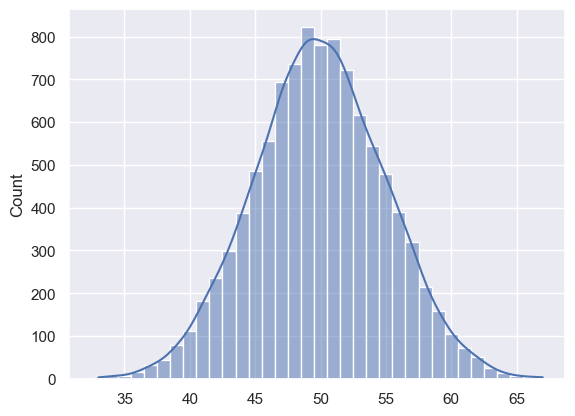

In [4]:
# to simulate 100 tosses of a fair coin 10,000 times and plot the resulting distribution

fair = np.random.binomial(n=100, p=0.5, size=10000)
bins_fair = [el-0.5 for el in list(set(fair))]
sns.histplot(fair, bins=bins_fair, kde=True)
plt.show()

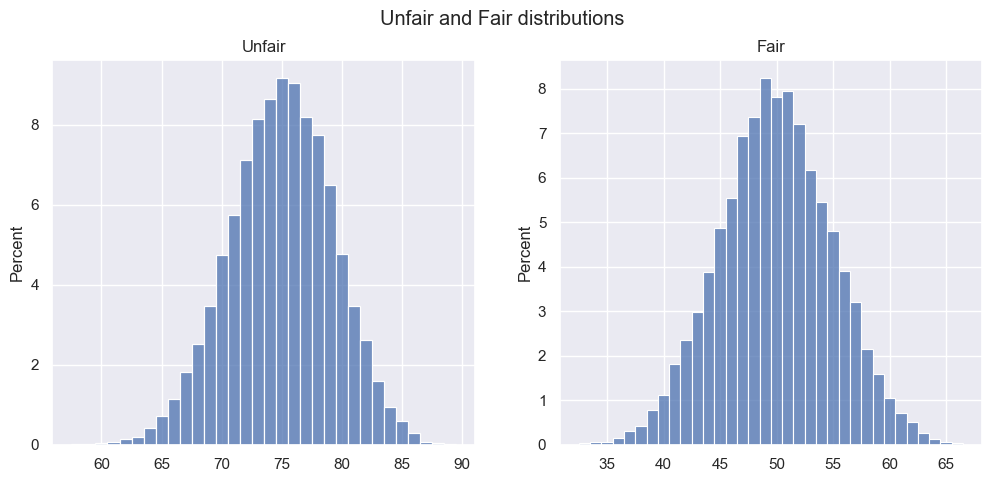

In [5]:
# comparison between tosses of a fair coin and an unfair one with p=0.75

unfair = np.random.binomial(n=100, p=0.75, size=10000)
bins_unfair = [el-0.5 for el in list(set(unfair))]
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle('Unfair and Fair distributions')

sns.histplot(unfair, ax=ax[0], bins=bins_unfair, stat='percent').set_title('Unfair')
sns.histplot(fair, ax=ax[1],  bins=bins_fair, stat='percent').set_title('Fair')
plt.show()

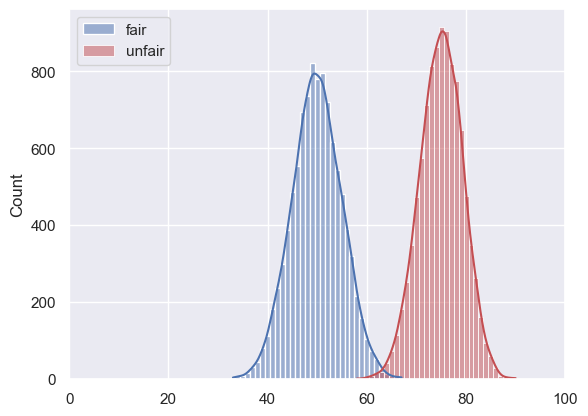

In [7]:
ax = sns.histplot(fair, bins=bins_fair, label='fair', kde=True)
sns.histplot(unfair, bins=bins_unfair, label='unfair', color='r', kde=True)
ax.set_xlim(0, 100)
ax.legend(loc=2)
plt.show()

In [8]:
# to write a program that keeps flipping a coin until it gets head ten times in a row 

res = 0
cnt = 0
while res < 10:
    res = np.random.binomial(n=10, p=0.5)
    cnt += 1
print('Reached 10 straight heads after', cnt, 'tosses!')

Reached 10 straight heads after 589 tosses!


In [9]:
# to write the same program as a function

def tosses10():
    res = 0
    cnt = 0
    while res < 10:
        res = np.random.binomial(n=10, p=0.5)
        cnt += 1
    return cnt

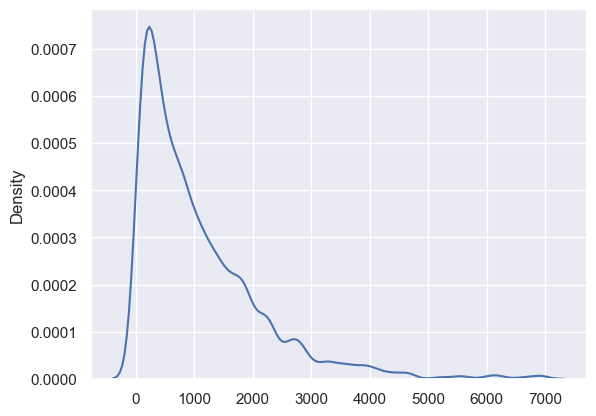

In [10]:
# to run tosses10() 1,000 times and plot the resulting distribution

rounds = [tosses10() for toss in range(1000)]
sns.kdeplot(rounds, bw_adjust=0.5)
plt.show()

### Roll a dice

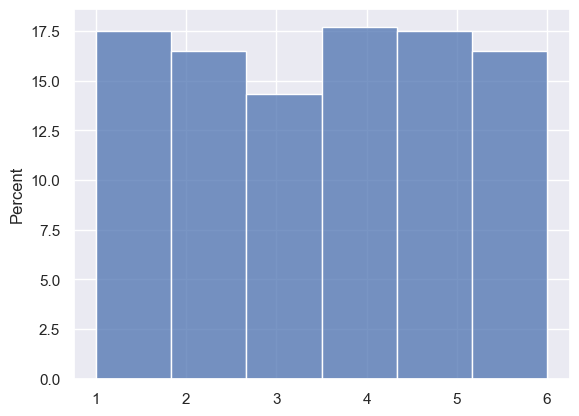

In [11]:
# to simulate 1,000 rolls of a die and print the resulting distribution

rolls = [np.random.choice(range(1, 7)) for num in range(1000)]
sns.histplot(rolls, bins=6, stat='percent')
plt.show()

### A fictitious dataframe

In [12]:
# to create a dataframe with some random probability distributions

df_sim= pd.DataFrame({'id': range(1001, 2001),
                    'gender': np.random.binomial(n=1, p=0.5042, size=1000),
                    'height': np.random.normal(170, 10, 1000),
                    'eyes': np.random.choice(['green', 'blue', 'hazel', 'brown', 'other'], 
                                            p=[0.03, 0.1, 0.1, 0.7, 0.07], size=1000),
                    'score': np.random.poisson(7, 1000)})
df_sim.sample(5)

,id,gender,height,eyes,score
915,1916,0,180.336037,brown,9
920,1921,0,164.562189,brown,7
647,1648,1,167.256778,brown,10
242,1243,0,190.163222,brown,6
474,1475,1,171.361678,brown,10


### Magic 8 Ball

In [22]:
# to simulate a negatively biased Magic 8 Ball by entering a yes or no question

# to scrape responses from wikipedia with BeautifulSoup

url = 'https://en.wikipedia.org/wiki/Magic_8_Ball'
wiki_page = requests.get(url)
html_page = BeautifulSoup(wiki_page.content, 'html.parser')
table= html_page.find(class_='wikitable')
responses = table.text.split('\n● ')
responses = [response.replace('\n', '') for response in responses]
responses = responses[1:]
responses

['It is certain',
 'It is decidedly so',
 'Without a doubt',
 'Yes definitely',
 'You may rely on it',
 'As I see it, yes',
 'Most likely',
 'Outlook good',
 'Yes',
 'Signs point to yes',
 'Reply hazy, try again',
 'Ask again later',
 'Better not tell you now',
 'Cannot predict now',
 'Concentrate and ask again',
 "Don't count on it",
 'My reply is no',
 'My sources say no',
 'Outlook not so good',
 'Very doubtful']

In [23]:
# to program the Magic 8 Ball

def ask_question(): 
    intro = 'You may ask your yes or no question to the Magic 8 Ball!'
    question = input(intro)
    prob = [el for el in range(1, 21)]
    prob = [el/sum(prob) for el in prob]
    print(f'{intro}\n{question}\n{np.random.choice(responses, p=prob)}')

In [24]:
# ask a question!

ask_question()

You may ask your yes or no question to the Magic 8 Ball!
It will rain?
My sources say no
